# t-SNE and UMAP for Images: MNIST

In [47]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_openml
from sklearn.manifold import TSNE
from sklearn.preprocessing import StandardScaler

In [48]:
# Load MNIST dataset
X, y = fetch_openml('mnist_784', version=1, return_X_y=True)

/usr/local/lib/python3.10/dist-packages/sklearn/datasets/_openml.py:968: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


In [49]:
X

,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69995,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
69996,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
69997,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
69998,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [50]:
y

0        5
1        0
2        4
3        1
4        9
        ..
69995    2
69996    3
69997    4
69998    5
69999    6
Name: class, Length: 70000, dtype: category
Categories (10, object): ['0', '1', '2', '3', ..., '6', '7', '8', '9']

In [51]:
# Convert labels to integers
y = y.astype(int)
y

0        5
1        0
2        4
3        1
4        9
        ..
69995    2
69996    3
69997    4
69998    5
69999    6
Name: class, Length: 70000, dtype: int64

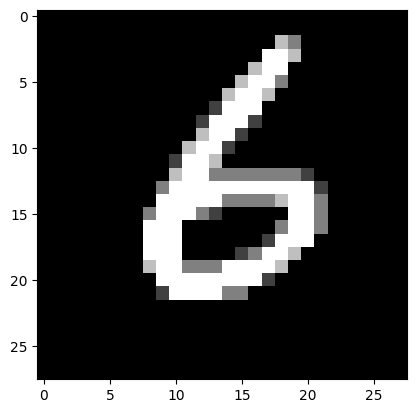

In [52]:
import math

dimension_length = int(math.sqrt(X.shape[1]))
single_image = X.iloc[66].array.reshape(dimension_length, dimension_length)
plt.imshow(single_image, cmap='gray')

In [58]:
# Select a subset of data for efficiency
np.random.seed(42)

indices = np.random.choice(len(X), 3000)
X_subset = X.iloc[indices]
y_subset = y[indices]

In [60]:
y_subset.unique()

array([0, 1, 6, 7, 8, 3, 2, 5, 4, 9])

In [61]:
# Standardize the data
scaler = StandardScaler()
X_subset_standardized = scaler.fit_transform(X_subset)

In [64]:
# Apply t-SNE to the data
tsne = TSNE(n_components=2, random_state=24)
X_tsne = tsne.fit_transform(X_subset_standardized)

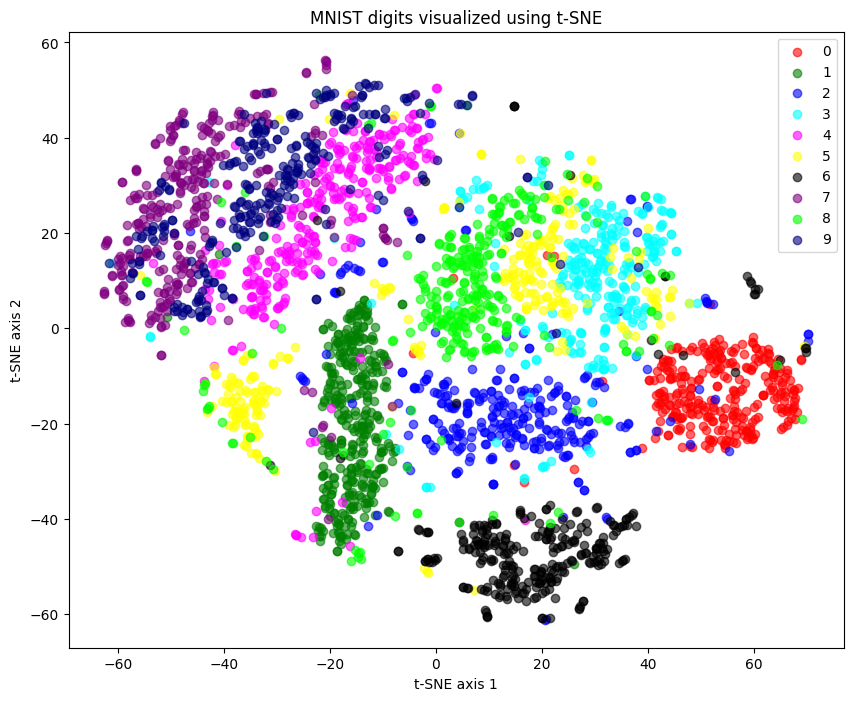

In [65]:
plt.figure(figsize=(10, 8))
colors = ['red', 'green', 'blue', 'cyan', 'magenta', 'yellow', 'black', 'purple', 'lime', 'navy']
for i in range(10):
    plt.scatter(X_tsne[y_subset == i, 0], X_tsne[y_subset == i, 1], c=colors[i], label=str(i), alpha=0.6)
plt.legend()
plt.title('MNIST digits visualized using t-SNE')
plt.xlabel('t-SNE axis 1')
plt.ylabel('t-SNE axis 2')
plt.show()

In [ ]:
!pip install umap-learn

In [66]:
# Apply UMAP to the data
import umap

umap = umap.UMAP(n_components=2, random_state=42)
X_umap = umap.fit_transform(X_subset_standardized)

/usr/local/lib/python3.10/dist-packages/umap/umap_.py:1943: UserWarning: n_jobs value -1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")


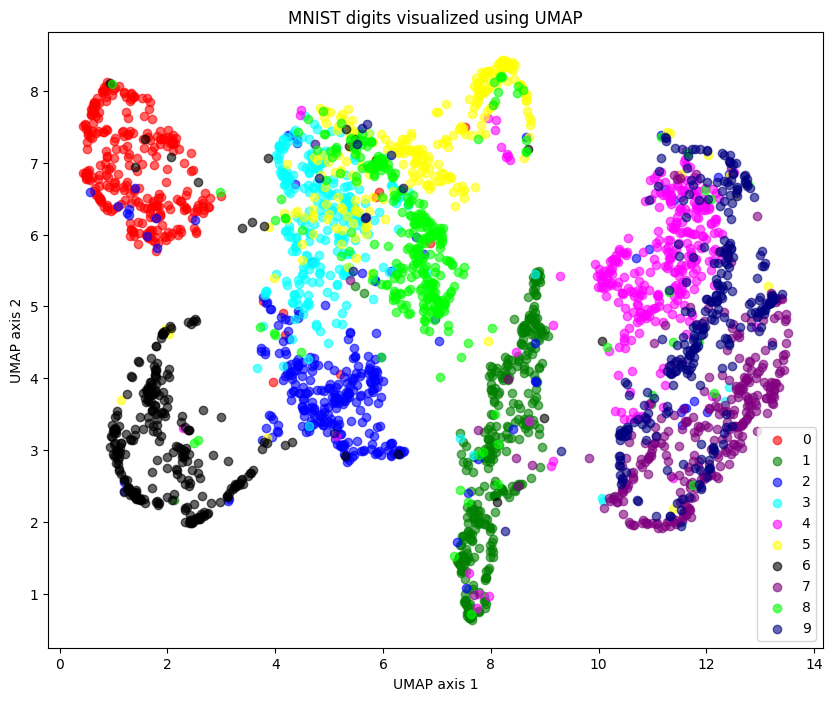

In [67]:
plt.figure(figsize=(10, 8))
colors = ['red', 'green', 'blue', 'cyan', 'magenta', 'yellow', 'black', 'purple', 'lime', 'navy']
for i in range(10):
    plt.scatter(X_umap[y_subset == i, 0], X_umap[y_subset == i, 1], c=colors[i], label=str(i), alpha=0.6)
plt.legend()
plt.title('MNIST digits visualized using UMAP')
plt.xlabel('UMAP axis 1')
plt.ylabel('UMAP axis 2')
plt.show()